<a href="https://colab.research.google.com/github/junsoo321/Yongan/blob/main/%EC%84%B1%EB%8A%A5%ED%8F%89%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Install dlib
!sudo apt-get update
!sudo apt-get install -y cmake
!pip install dlib

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 257 kB in 2s (120 kB/s)
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
cmake is already the newest version (3.22.1-1ubuntu1.22.04.2).
0 upgraded, 0 newly insta

In [6]:
# Install face_recognition
!pip install face_recognition

In [7]:
# Install other necessary libraries
!pip install numpy scikit-learn Pillow seaborn

In [8]:
# 패키지 설치 확인
import dlib
import face_recognition
import numpy as np
from sklearn import neighbors
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import os
from PIL import Image
from face_recognition.face_recognition_cli import image_files_in_folder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [19]:
from google.colab import drive
drive.mount('/content/drive')

# Navigate to your dataset directory
data_dir = '/content/drive/MyDrive/data/linearAlgebra2_face_detection_datasets'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import math
from sklearn import neighbors
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import os
import pickle
from PIL import Image
import face_recognition
from face_recognition.face_recognition_cli import image_files_in_folder
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
def load_data(data_dir):
    X = []
    y = []

    for team_dir in os.listdir(data_dir):
        team_path = os.path.join(data_dir, team_dir)
        if not os.path.isdir(team_path):
            continue

        for class_dir in os.listdir(team_path):
            class_path = os.path.join(team_path, class_dir)
            if not os.path.isdir(class_path):
                continue

            for img_path in image_files_in_folder(class_path):
                image = face_recognition.load_image_file(img_path)
                face_bounding_boxes = face_recognition.face_locations(image)

                if len(face_bounding_boxes) == 1:
                    face_encoding = face_recognition.face_encodings(image, known_face_locations=face_bounding_boxes)[0]
                    X.append(face_encoding)
                    y.append(f"{team_dir}_{class_dir}")

    return X, y

# Adjust the data directory path
data_dir = '/content/drive/MyDrive/data/linearAlgebra2_face_detection_datasets'  # Adjust this path based on your setup
X, y = load_data(data_dir)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
class TrainFaceData:
    def __init__(self, n_neighbors=None, knn_algo='ball_tree', verbose=False):
        self.n_neighbors = n_neighbors
        self.knn_algo = knn_algo
        self.verbose = verbose
        self.knn_clf = None

    def train(self, X_train, y_train):
        if self.n_neighbors is None:
            self.n_neighbors = int(round(math.sqrt(len(X_train))))
            if self.verbose:
                print("Automatically chosen n_neighbors:", self.n_neighbors)

        self.knn_clf = neighbors.KNeighborsClassifier(n_neighbors=self.n_neighbors, algorithm=self.knn_algo)
        self.knn_clf.fit(X_train, y_train)

    def predict(self, X_test):
        if not self.knn_clf:
            raise ValueError("Model not trained yet.")
        return self.knn_clf.predict(X_test)

trainer = TrainFaceData(verbose=True)
trainer.train(X_train, y_train)

Automatically chosen n_neighbors: 43


In [23]:
# 테스트 데이터 예
y_pred = trainer.predict(X_test)

Accuracy: 0.9910941475826972
Classification Report:
                precision    recall  f1-score   support

team1_001_PIW       1.00      1.00      1.00        16
team1_002_KHH       1.00      1.00      1.00        32
team1_003_CSB       1.00      1.00      1.00        25
team1_005_LSE       0.96      1.00      0.98        25
team2_001_PJS       1.00      1.00      1.00        30
team2_002_KMG       1.00      1.00      1.00        27
team2_003_KMS       1.00      1.00      1.00        34
team2_004_LJH       0.96      1.00      0.98        22
team2_005_KUS       1.00      1.00      1.00        12
team3_001_KHY       1.00      1.00      1.00        28
team3_002_KMJ       1.00      1.00      1.00        29
team3_003_KKJ       1.00      1.00      1.00        22
team3_004_KMS       1.00      0.97      0.98        32
team4_001_KRE       1.00      1.00      1.00        29
team4_002_KYW       1.00      1.00      1.00        31
team4_003_LGE       0.96      1.00      0.98        26
team4_004_S

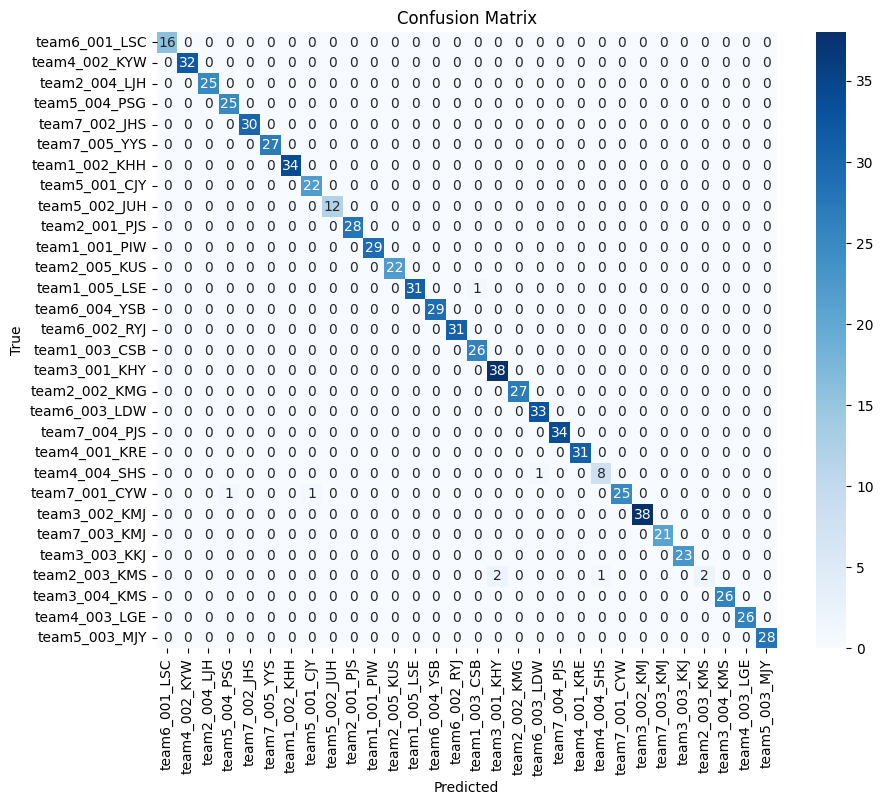

In [24]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# Plotting Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()